# Reading Data from Web Sites

## Loading HTML data

In [1]:
import pandas as pd
import numpy as np

## Loading from simple web sites 

If you have a simple web page with a single table, you can pass the URL of the page to Pandas and call read_html. 

In [7]:
url = 'http://www.fdic.gov/bank/individual/failed/banklist.html'
dfs = pd.read_html(url)

read_html is returning a list of all the tables in the page. If we pring the first element (index 0 in the list), we will get the first data frame/table in that page.

In [17]:
dfs[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
1,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
2,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
3,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
4,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"
...,...,...,...,...,...,...
556,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001"
557,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001"
558,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001"
559,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000"


## Loading from complex web sites

Many times pages will be more complex and we can still extract the relevant data. 

In [18]:
url = 'https://ncov2019.live/data'
table_id = 'sortable_table_world'

In [19]:

import requests

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)


df_list = pd.read_html(r.text, attrs={'id': table_id})


In [15]:
df_list[0]

,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population
0,TOTAL,30993016,3986,16395,0.05%,61410,961479,124,607,0.06%,598346540,7499869,22368118,2877,7774812442
1,★ Afghanistan,39044,998,125,0.32%,93,1441,37,4,0.28%,108591,5027,32576,833,39115100
2,★ Albania,12226,4249,0,0%,13,358,124,0,0%,74487,4980,6888,2394,2877094
3,★ Algeria,49623,1127,0,0%,31,1665,38,0,0%,Unknown,Unknown,34923,793,44021396
4,★ Andorra,1564,0,0,0%,4,53,0,0,0%,137457,347,1164,0,77293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,★ Montserrat,13,0,0,0%,Unknown,1,0,0,0%,373,0,12,0,4993
211,★ Falkland Islands,13,0,0,0%,Unknown,Unknown,Unknown,0,0%,2261,Unknown,13,0,3501
212,★ Saint Pierre and Miquelon,11,0,0,0%,Unknown,Unknown,Unknown,0,0%,1051,Unknown,5,0,5788
213,★ Anguilla,3,0,0,0%,Unknown,Unknown,Unknown,0,0%,1020,Unknown,3,0,15032


In [20]:
df = df_list[0]

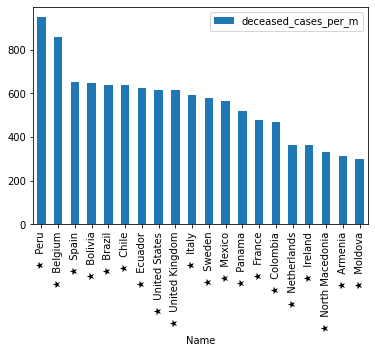

In [37]:
(
    df
    .assign(confirmed_cases_per_m=lambda x: pd.to_numeric(x['Per Million'],  errors='coerce'))
    .assign(deceased_cases_per_m=lambda x: pd.to_numeric(x['Per Million.1'],  errors='coerce'))
    .fillna(0)
    # .info()
    .sort_values(by='deceased_cases_per_m',ascending=False)
    .iloc[:20,:]
    .plot
    .bar(x='Name', y=['deceased_cases_per_m'])
)